In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
data=load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [4]:
x=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.1)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred=lr.predict(x_test)


In [9]:
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
print("r2 score :",r2_score(y_test,y_pred))
print("rmse score :",mean_squared_error(y_test,y_pred))

r2 score : 0.5514200923362632
rmse score : 2743.911237757695


In [11]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=.013)

In [12]:
r.fit(x_train,y_train)

,alpha,0.013
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [13]:
y_pred=r.predict(x_test)

In [14]:
print("r2 score :",r2_score(y_test,y_pred))
print("rmse score :",mean_squared_error(y_test,y_pred))

r2 score : 0.5528269801724115
rmse score : 2735.3054681324406


# Making my own ridge regression class   


In [15]:
from sklearn.datasets import make_regression

In [32]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=14)

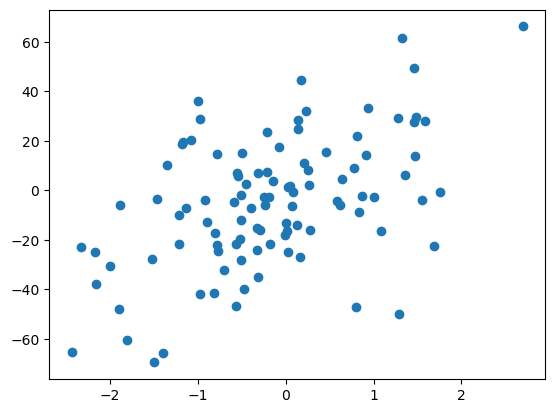

In [33]:
plt.scatter(x,y)

In [34]:
lr=LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[12.93938844]
-2.8330117258886567


In [41]:
rg=Ridge(alpha=2)
rg.fit(x,y)
print(rg.coef_)
print(rg.intercept_)

[12.70032322]
-2.873941645051286


In [44]:
class MyRidge():
    def __init__(self,alpha=1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,x_train,y_train):
        num=0
        den=0

        for i in range(x_train.shape[0]):
            num=num+((y_train[i]-y_train.mean())*(x_train[i]-x_train.mean()))
            den=den+((x_train[i]-x_train.mean())**2)
            
        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-(self.m *x_train.mean())

        print(self.m,self.b)
    def predict(self):
        pass

In [45]:
mr=MyRidge(2)
mr.fit(x,y)

[12.70032322] [-2.87394165]
